# Project#1

Comment: the results show that all the kernels and regularization values have the same accuracy score on the test data, which is very high. This suggests that the data is not very complex or noisy, and that any of the kernels and regularization values can be used to achieve a good performance. 

Accuracy for dataset 1: 0.9974619289340102


C:\Users\Ahmed-Ashraf\AppData\Roaming\Python\Python311\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
C:\Users\Ahmed-Ashraf\AppData\Roaming\Python\Python311\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
C:\Users\Ahmed-Ashraf\AppData\Roaming\Python\Python311\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
C:\Users\Ahmed-Ashraf\AppData\Roaming\Python\P

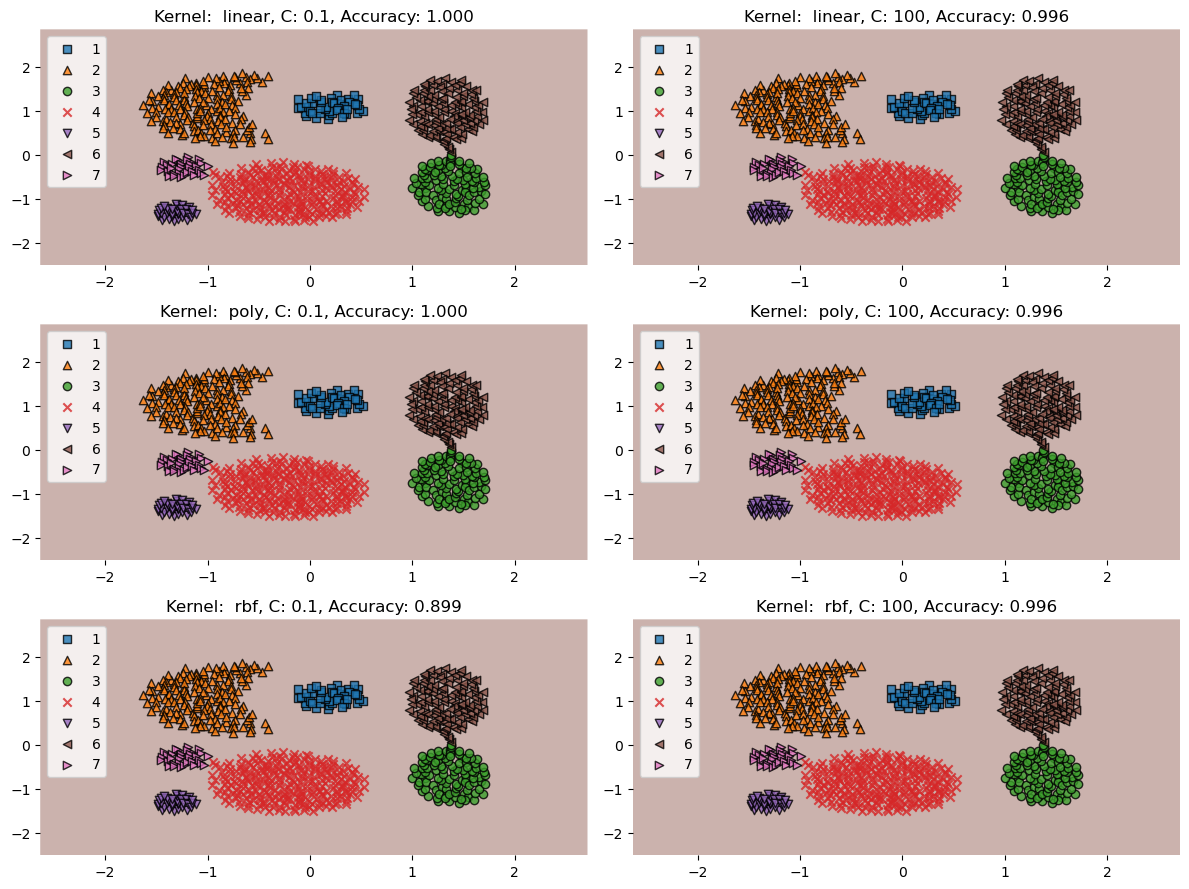

Accuracy for dataset 2: 0.9348370927318296


C:\Users\Ahmed-Ashraf\AppData\Roaming\Python\Python311\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
C:\Users\Ahmed-Ashraf\AppData\Roaming\Python\Python311\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
C:\Users\Ahmed-Ashraf\AppData\Roaming\Python\Python311\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
C:\Users\Ahmed-Ashraf\AppData\Roaming\Python\P

<Figure size 640x480 with 0 Axes>

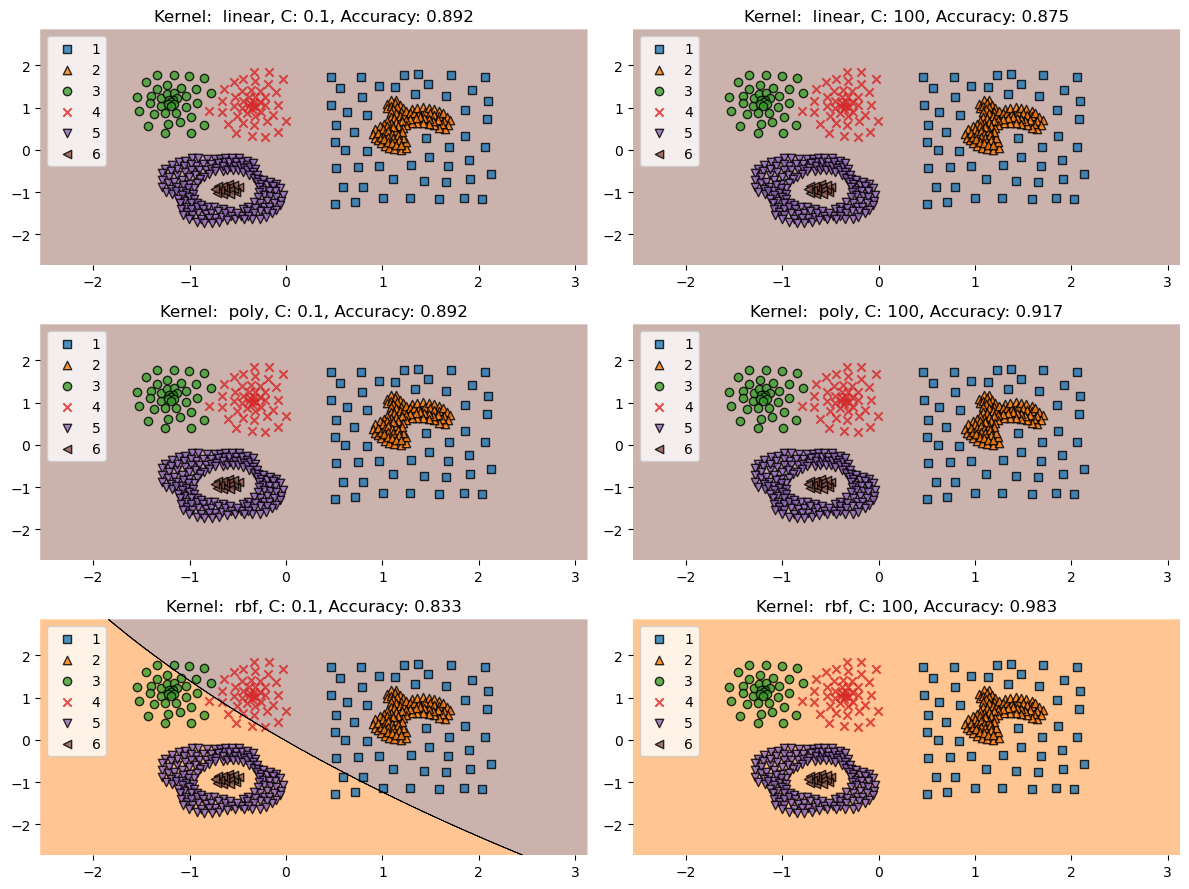

Accuracy for dataset 3: 0.9839743589743589


<Figure size 640x480 with 0 Axes>

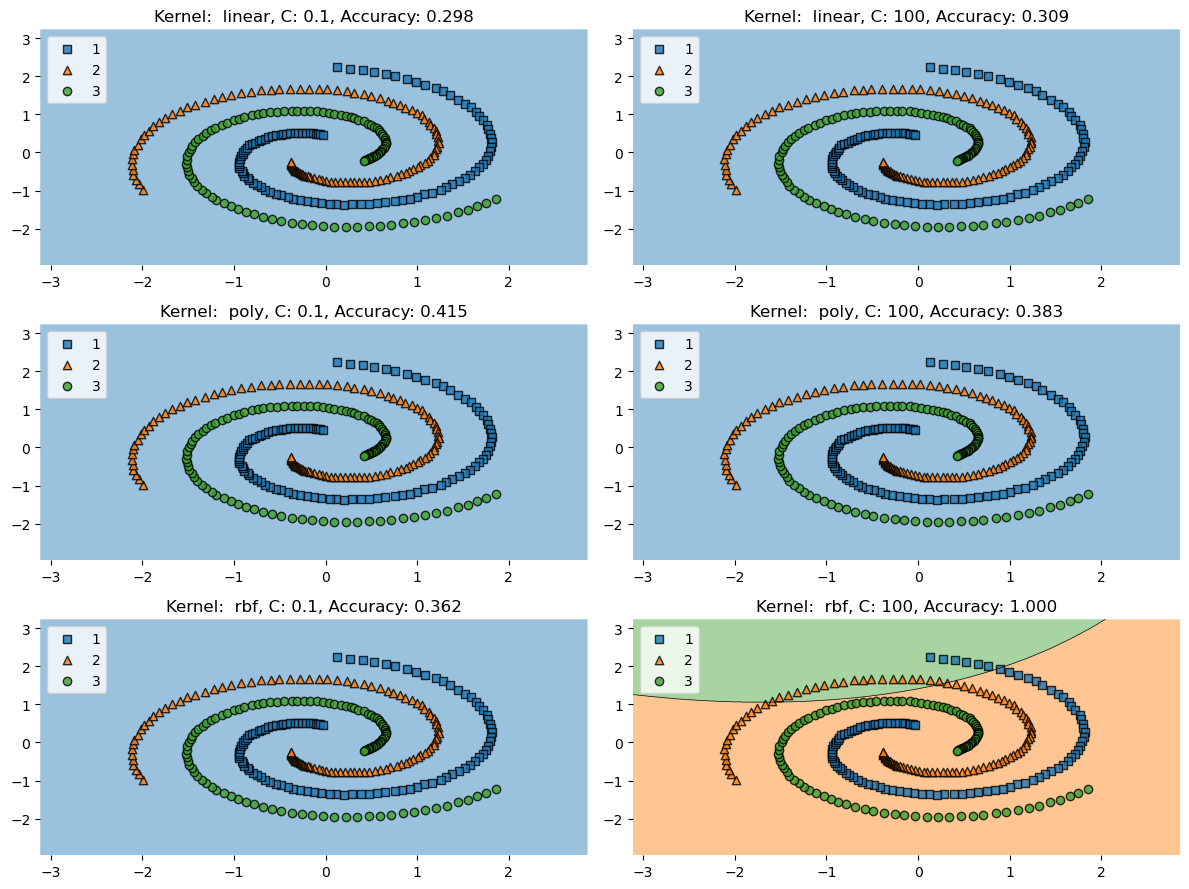

Accuracy for dataset 4: 0.9958333333333333


<Figure size 640x480 with 0 Axes>

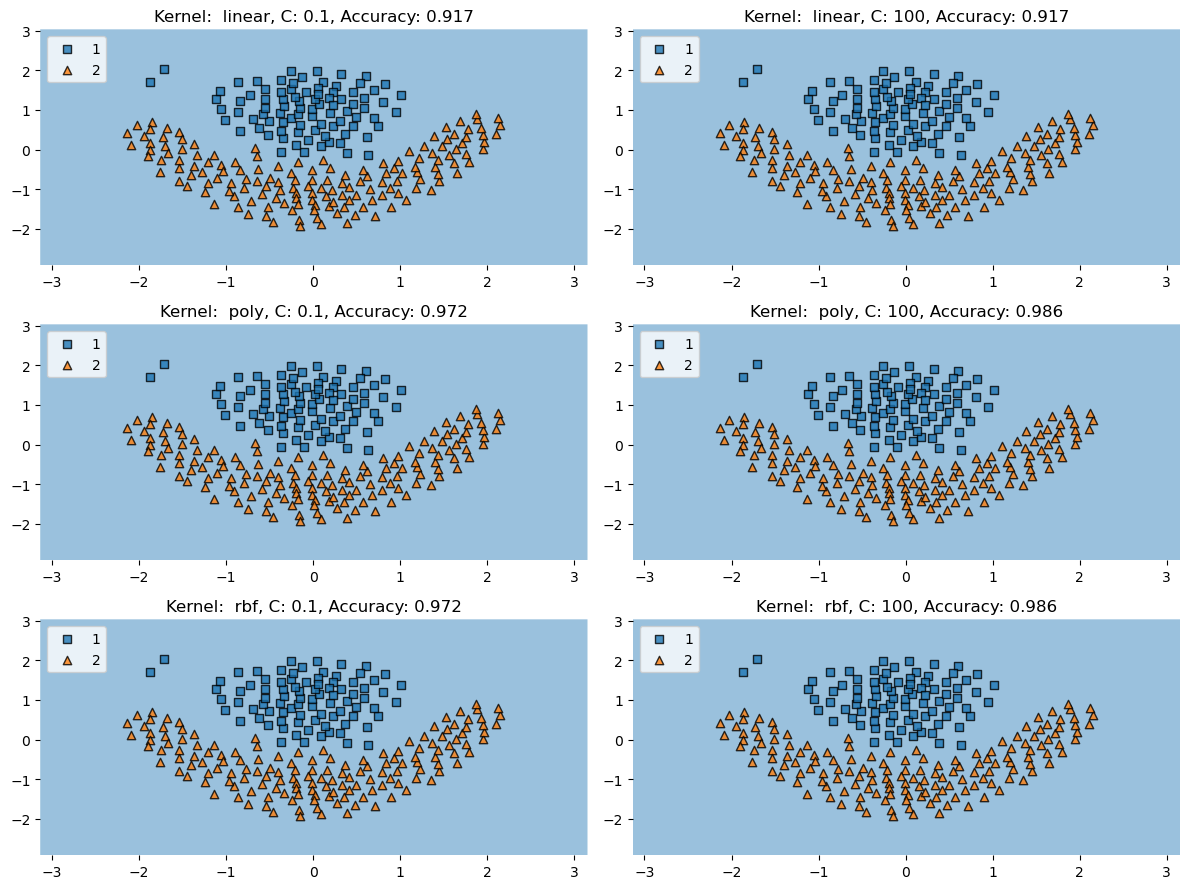

Accuracy for dataset 5: 1.0


<Figure size 640x480 with 0 Axes>

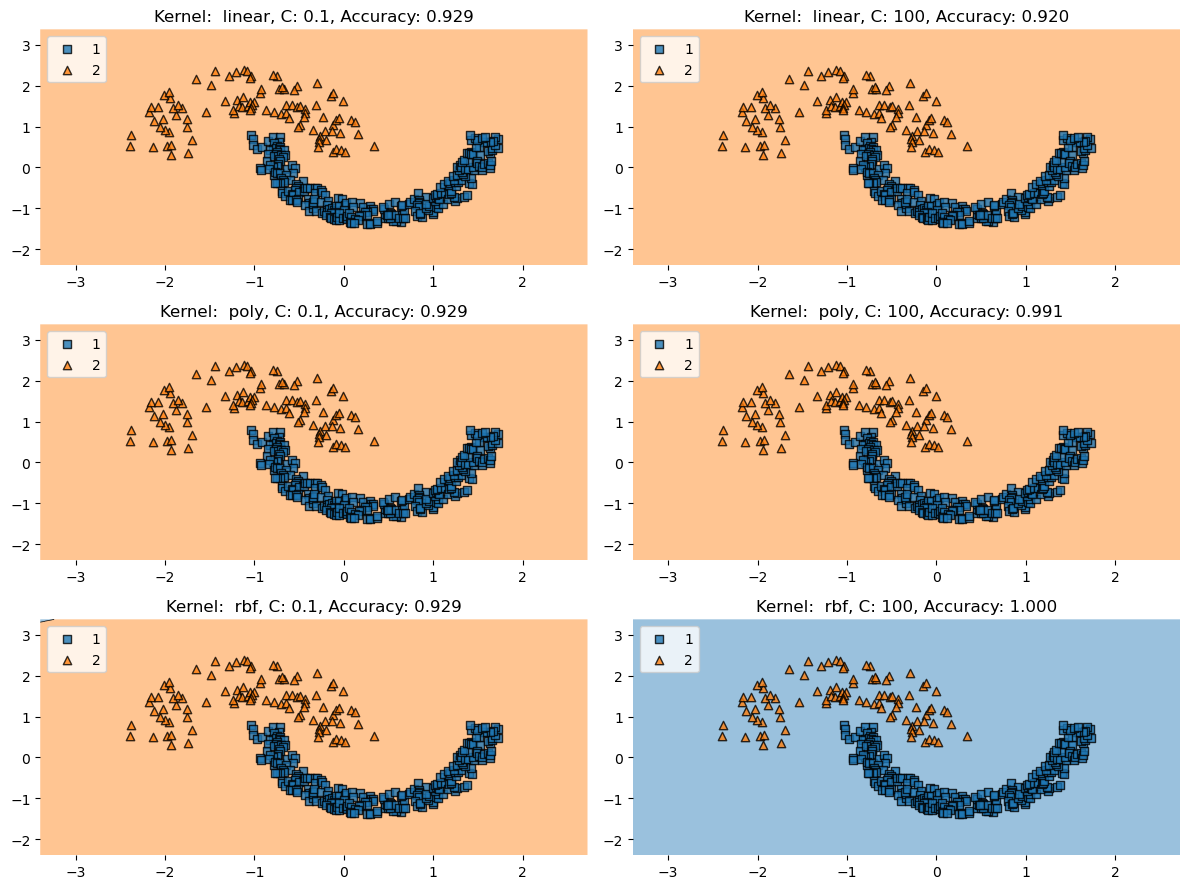

Accuracy for dataset 6: 0.99


<Figure size 640x480 with 0 Axes>

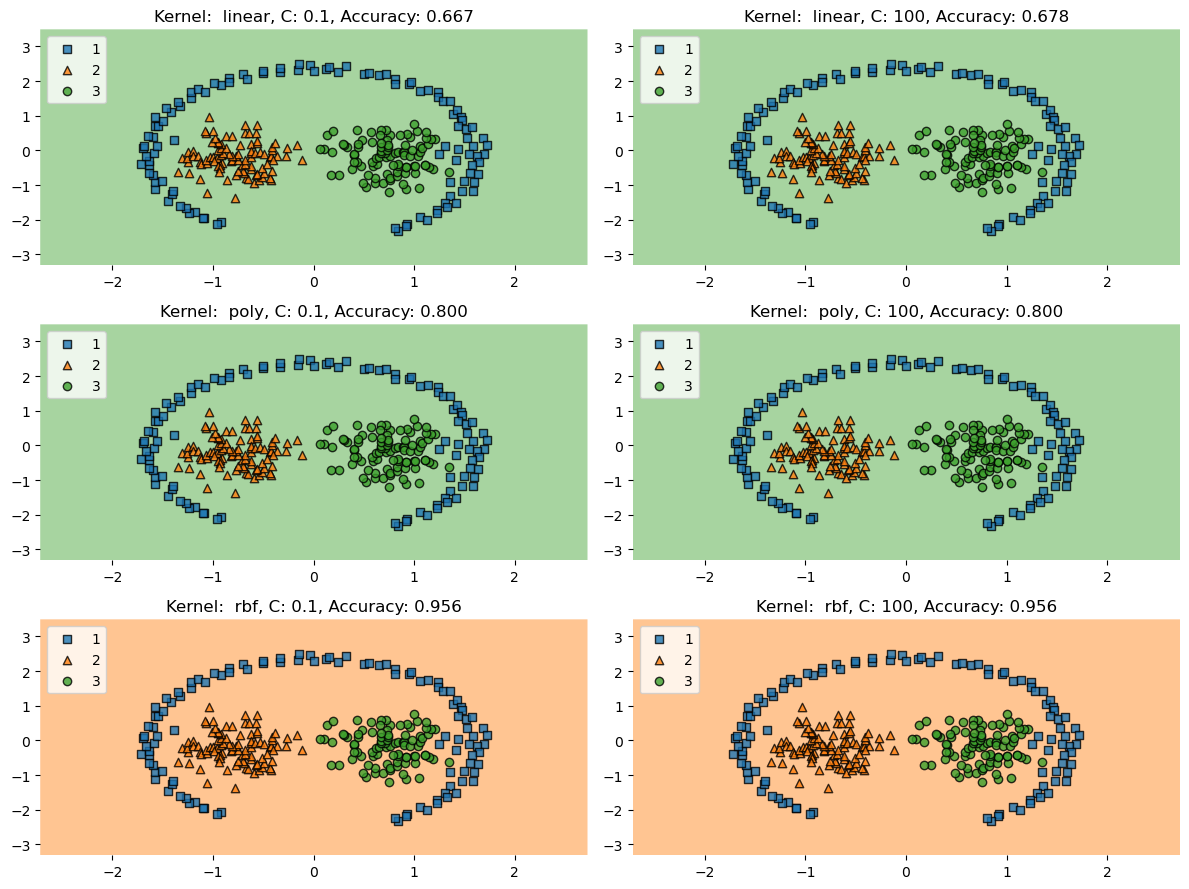

<Figure size 640x480 with 0 Axes>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

data_urls = ["http://cs.joensuu.fi/sipu/datasets/Aggregation.txt",
             "http://cs.joensuu.fi/sipu/datasets/Compound.txt",
             "http://cs.joensuu.fi/sipu/datasets/spiral.txt",
             "http://cs.joensuu.fi/sipu/datasets/flame.txt",
             "http://cs.joensuu.fi/sipu/datasets/jain.txt",
             "http://cs.joensuu.fi/sipu/datasets/pathbased.txt"]

kernels = ["linear", "poly", "rbf"]
Cs = [0.1, 100]
# Loop over the datasets
for i, data_url in enumerate(data_urls):
    # Load the dataset from the URL
    data = np.loadtxt(data_url)
    X = data[:, :2] 
    y = data[:, 2]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    svm = SVC()
    svm.fit(X_scaled, y)
    print(f"Accuracy for dataset {i+1}:", svm.score(X_scaled, y))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Create a figure with 3 rows and 2 columns
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 9))

    # Loop over the kernels
    for j, kernel in enumerate(kernels):
        # Loop over the regularization values
        for k, C in enumerate(Cs):
            svm = SVC(kernel=kernel, C=C)
            svm.fit(X_train, y_train)
            y_pred = svm.predict(X_test)

            # Compute the accuracy score of the classifier
            acc = accuracy_score(y_test, y_pred)

            # Plot the decision boundary of the classifier
            plot_decision_regions(X_scaled, y.astype(int), clf=svm, ax=axes[j,k])
            axes[j,k].set_title(f"Kernel:  {kernel}, C: {C}, Accuracy: {acc:.3f}")
            axes[j,k].legend(loc="upper left")

    plt.tight_layout()
   

    # Save the figure as a png file with a unique name
    plt.savefig(f"dataset_{i+1}.png")

    # Close the figure
    plt.close(fig)
    plt.show()